# Cookd Sales Data Analysis

In [29]:
import pandas as pd
import random
import string
from faker import Faker

fake = Faker()

# Generate random order date
order_date = fake.date_between(start_date=pd.to_datetime("2023-01-01"), end_date=pd.to_datetime("2024-11-30"))

# Parameters
num_records = 100000
tamilnadu_ratio = 0.5
kerala_karnataka_ratio = 0.42
abroad_ratio = 0.08
products = [
    ("Fried Chicken Kit", 299, "Starter"), ("Wedding Bhai Biryani Kit", 249, "Biryani"),
    ("Pallipalayam Masala", 198, "Masala"), ("Madras 65", 198, "Masala"),
    ("Tandoori Tikka Kit", 298, "Starter"), ("Butter Masala Gravy", 299, "Masala"),
    ("Ambur Biryani Kit", 249, "Biryani"), ("Chettinad Masala", 198, "Masala"),
    ("Dindigul Biryani Kit", 299, "Biryani"), ("Malai Tikka Kit", 298, "Starter"),
    ("Madurai Chukka Masala", 198, "Masala"), ("Mangalore Ghee Roast", 299, "Masala"),
    ("Fish fry masala", 258, "Masala"), ("Kerala Chicken Fry", 258, "Masala"),
    ("Guntur Masala", 198, "Masala") , ("Manchurian Kit", 199, "Starter"), ("Hot Garlic Kit", 199, "Starter"), 
    ("Black Pepper Kit", 199, "Starter") 
]
combos = [
    ("Biryanis of Tamilnadu", 897, "Combo"), ("Flavours of Tamilnadu", 297, "Combo"),
    ("65 Biryani", 398, "Combo"), ("3 States Masala", 357, "Combo"),
    ("Atomic Crunch", 398, "Combo"), ("Heritage of Tamilnadu", 297, "Combo"),
    ("Taste Of Tamilnadu", 396, "Combo"), ("Chettinad Biryani", 398, "Combo"),
    ("Thokku Biryani", 348, "Combo"), ("Midnight Biryani Cravings", 447, "Combo"),
    ("Gilma Biryani", 348, "Combo"), ("Chettinad 65 Fried Rice", 198, "Combo"),
    ("Samba Biryani Duo", 598, "Combo"), ("Chukka Biryani", 348, "Combo"),
    ("Tawa Biryani", 398, "Combo"), ("Biryani Heaven", 598, "Combo"),
    ("Southern Crunch", 327, "Combo"), ("Sunday Virundhu", 596, "Combo"),
    ("Chettinad Malai Tikka", 248, "Combo"), ("Chinese Starter Kits", 597, "Combo")
]
product_list = products + combos
states_tamilnadu = ["Chennai", "Coimbatore", "Madurai", "Trichy", "Salem"]
states_kerala_karnataka = ["Bangalore", "Mysore", "Kochi", "Thiruvananthapuram"]
abroad_countries = ["USA", "UK", "Canada", "Australia"]

# Helper Functions
def generate_customer_id(index):
    prefix = random.choice(string.ascii_uppercase)
    return f"{prefix}{index}"

def generate_discount(total_amount):
    if random.random() < 0.2:  # 20% of data has discount
        discount_percentage = random.choice([5, 10])
        discount_code = f"Cookd{discount_percentage}"
        discount_amount = round(total_amount * discount_percentage / 100, 2)
        return discount_code, discount_amount
    return None, 0

def calculate_delivery_charge(subtotal):
    return 0 if subtotal > 1000 else 50

# Adjusted Product Distribution: Higher frequency for top sellers
product_weights = {
    "Fried Chicken Kit": 0.14,  # 14% of the data
    "Dindigul Biryani Kit": 0.11,  # 11% of the data
    "Ambur Biryani Kit": 0.10,  # 10% of the data
    "Madras 65": 0.09,  # 9% of the data
    "Chettinad Masala": 0.09,  # 9% of the data
    "Tandoori Tikka Kit": 0.06,  # 6% of the data
}

# Adjusted Combo Distribution: Higher frequency for top sellers
combo_weights = {
    "Biryanis of Tamilnadu": 0.15,  # 15% of the combo data
    "Chinese Starter Kit": 0.12,  # 12% of the combo data
    "Thokku Biryani": 0.10,  # 10% of the combo data
    "3 States Masala": 0.09,  # 9% of the combo data
    "65 Biryani": 0.8,  # 8% of the combo data

}

# Normalize the weights so they sum up to 1 for both products and combos
total_product_weight = sum(product_weights.values())
normalized_product_weights = {k: v / total_product_weight for k, v in product_weights.items()}

total_combo_weight = sum(combo_weights.values())
normalized_combo_weights = {k: v / total_combo_weight for k, v in combo_weights.items()}

# Add remaining products with lower weights
remaining_products = [p[0] for p in product_list if p[0] not in product_weights]
remaining_weight = 1 - sum(normalized_product_weights.values())
remaining_weight_per_product = remaining_weight / len(remaining_products)

# Update normalized_weights with remaining products
for product in remaining_products:
    normalized_product_weights[product] = remaining_weight_per_product

# Add remaining combos with lower weights
remaining_combos = [c[0] for c in combos if c[0] not in combo_weights]
remaining_combo_weight = 1 - sum(normalized_combo_weights.values())
remaining_combo_weight_per_combo = remaining_combo_weight / len(remaining_combos)

# Update normalized_combo_weights with remaining combos
for combo in remaining_combos:
    normalized_combo_weights[combo] = remaining_combo_weight_per_combo

# Data Creation
fake = Faker()
data = []
for i in range(1, num_records + 1):
    # Location Distribution
    region = random.choices(["Tamilnadu", "Kerala/Karnataka", "Abroad"], 
                             weights=[tamilnadu_ratio, kerala_karnataka_ratio, abroad_ratio])[0]
    if region == "Tamilnadu":
        state = "Tamilnadu"
        district = random.choices(states_tamilnadu, weights=[0.5] + [0.125] * 4)[0]
        days_to_delivery = 2
    elif region == "Kerala/Karnataka":
        state = random.choice(["Kerala", "Karnataka"])
        district = random.choice(states_kerala_karnataka)
        days_to_delivery = random.randint(3, 4)
    else:
        state = None
        district = random.choice(abroad_countries)
        days_to_delivery = random.randint(5, 7)
    
    # Customer Details
    customer_id = generate_customer_id(i)
    customer_name = fake.name()
    customer_email = fake.email()
    customer_phone = fake.phone_number()
    customer_age = random.choices(
        range(20, 51), weights=[70 if 20 <= x <= 35 else 20 if 36 <= x <= 50 else 10 for x in range(20, 51)]
    )[0]

    # Order Details
    order_id = f"ORD{i:06}"
    # Choose a product based on the weights
    product_name = random.choices(list(normalized_product_weights.keys()), weights=list(normalized_product_weights.values()))[0]
    product = next(p for p in product_list if p[0] == product_name)
    product_id = f"PROD{i%len(product_list)+1}"
    product_price, product_category = product[1], product[2]
    quantity = random.randint(1, 5)
    subtotal = product_price * quantity
    discount_code, discount_amount = generate_discount(subtotal)
    delivery_charge = calculate_delivery_charge(subtotal)
    total_amount = subtotal - discount_amount + delivery_charge
    order_date = fake.date_between(start_date="-1y", end_date="today")
    delivery_date = order_date + pd.Timedelta(days=days_to_delivery)
    payment_method = random.choices(
        ["Credit Card", "Debit Card", "Net Banking", "Cash on Delivery"], 
        weights=[20, 35, 15, 30]
    )[0]
    payment_status = "Successful"
    order_status = random.choice(["Pending", "Processing", "Shipped", "Delivered", "Cancelled"])
    marketing_channel = random.choices(["YouTube", "Instagram", "Others"], weights=[85, 10, 5])[0]
    feedback_rating = round(random.uniform(3.0, 5.0), 1)

    data.append([order_id, customer_id, customer_name, customer_email, customer_phone, 
        district, state, customer_age, product_id, product_name, product_category, product_price, 
        quantity, subtotal, discount_code, discount_amount, delivery_charge, total_amount, 
        order_date, delivery_date, days_to_delivery, payment_method, payment_status, 
        order_status, marketing_channel, feedback_rating])

# Convert to DataFrame
columns = [
    "Order ID", "Customer ID", "Customer Name", "Customer Email", "Customer Phone", 
    "District", "State", "Customer Age", "Product ID", "Product Name", "Product Category", 
    "Product Price", "Quantity", "Subtotal", "Discount Code", "Discount Amount", 
    "Delivery Charge", "Total Amount", "Order Date", "Delivery Date", "Days to Delivery", 
    "Payment Method", "Payment Status", "Order Status", "Marketing Channel", 
    "Feedback Rating"
]
df = pd.DataFrame(data, columns=columns)
# Save to CSV
file_path = r"C:\Users\logeshwar\Downloads\Project Cookd\Cookd_Sales_Data.csv"  # Use raw string to handle backslashes
df.to_csv(file_path, index=False)
print(f"CSV file saved at: {file_path}")

CSV file saved at: C:\Users\logeshwar\Downloads\Project Cookd\Cookd_Sales_Data.csv


In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
# File path
file_path = r"C:\Users\logeshwar\Downloads\Project Cookd\Cookd_Sales_Data.csv"

# Reading the CSV file
Cookd_Sales_Data = pd.read_csv(file_path)

# Display the first few rows of the data
print(Cookd_Sales_Data.head())

    Order ID Customer ID        Customer Name            Customer Email  \
0  ORD000001          W1      Rodney Richards        joan65@example.org   
1  ORD000002          S2       Heather Miller       jrivera@example.org   
2  ORD000003          W3         Meghan Lewis  kennethbrown@example.org   
3  ORD000004          J4  Dr. Travis Hayes MD       david98@example.net   
4  ORD000005          E5      Tanya Henderson        kparks@example.net   

          Customer Phone   District      State  Customer Age Product ID  \
0  +1-287-251-6387x01290  Australia        NaN            20      PROD2   
1             4272858216         UK        NaN            44      PROD3   
2           216.269.6490    Madurai  Tamilnadu            22      PROD4   
3          (938)893-2555  Bangalore     Kerala            20      PROD5   
4     (513)967-5140x4563     Mysore     Kerala            20      PROD6   

           Product Name  ... Delivery Charge  Total Amount  Order Date  \
0     Fried Chicken Kit 

# Data Cleaning 

In [32]:
Cookd_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Order ID           100000 non-null  object 
 1   Customer ID        100000 non-null  object 
 2   Customer Name      100000 non-null  object 
 3   Customer Email     100000 non-null  object 
 4   Customer Phone     100000 non-null  object 
 5   District           100000 non-null  object 
 6   State              92084 non-null   object 
 7   Customer Age       100000 non-null  int64  
 8   Product ID         100000 non-null  object 
 9   Product Name       100000 non-null  object 
 10  Product Category   100000 non-null  object 
 11  Product Price      100000 non-null  int64  
 12  Quantity           100000 non-null  int64  
 13  Subtotal           100000 non-null  int64  
 14  Discount Code      19658 non-null   object 
 15  Discount Amount    100000 non-null  float64
 16  Del

In [33]:
# Fill missing values in the 'State' column with 'NA'
Cookd_Sales_Data['State'] = Cookd_Sales_Data['State'].fillna('NA')

# Fill missing values in 'Discount Code' with 'No Discount'
Cookd_Sales_Data['Discount Code'] = Cookd_Sales_Data['Discount Code'].fillna('No Discount')

# Change dtype for 'Customer Age' to object
Cookd_Sales_Data['Customer Age'] = Cookd_Sales_Data['Customer Age'].astype(str)

# Change dtype for 'Days to Delivery' to object
Cookd_Sales_Data['Days to Delivery'] = Cookd_Sales_Data['Days to Delivery'].astype(str)

# Change dtype for 'Feedback Rating' to object
Cookd_Sales_Data['Feedback Rating'] = Cookd_Sales_Data['Feedback Rating'].astype(str)

# Convert 'Order Date' and 'Delivery Date' to datetime dtype
Cookd_Sales_Data['Order Date'] = pd.to_datetime(Cookd_Sales_Data['Order Date'], errors='coerce')
Cookd_Sales_Data['Delivery Date'] = pd.to_datetime(Cookd_Sales_Data['Delivery Date'], errors='coerce')

# Check the updated data types
print(Cookd_Sales_Data.dtypes)


Order ID                     object
Customer ID                  object
Customer Name                object
Customer Email               object
Customer Phone               object
District                     object
State                        object
Customer Age                 object
Product ID                   object
Product Name                 object
Product Category             object
Product Price                 int64
Quantity                      int64
Subtotal                      int64
Discount Code                object
Discount Amount             float64
Delivery Charge               int64
Total Amount                float64
Order Date           datetime64[ns]
Delivery Date        datetime64[ns]
Days to Delivery             object
Payment Method               object
Payment Status               object
Order Status                 object
Marketing Channel            object
Feedback Rating              object
dtype: object


In [34]:
Cookd_Sales_Data.head(10)

,Order ID,Customer ID,Customer Name,Customer Email,Customer Phone,District,State,Customer Age,Product ID,Product Name,...,Delivery Charge,Total Amount,Order Date,Delivery Date,Days to Delivery,Payment Method,Payment Status,Order Status,Marketing Channel,Feedback Rating
0,ORD000001,W1,Rodney Richards,joan65@example.org,+1-287-251-6387x01290,Australia,NA,20,PROD2,Fried Chicken Kit,...,0,1495.0,2024-02-19,2024-02-26,7,Cash on Delivery,Successful,Shipped,YouTube,4.5
1,ORD000002,S2,Heather Miller,jrivera@example.org,4272858216,UK,NA,44,PROD3,Chettinad Masala,...,50,248.0,2024-08-15,2024-08-20,5,Net Banking,Successful,Processing,YouTube,3.4
2,ORD000003,W3,Meghan Lewis,kennethbrown@example.org,216.269.6490,Madurai,Tamilnadu,22,PROD4,Fried Chicken Kit,...,0,1495.0,2024-07-09,2024-07-11,2,Debit Card,Successful,Processing,YouTube,4.4
3,ORD000004,J4,Dr. Travis Hayes MD,david98@example.net,(938)893-2555,Bangalore,Kerala,20,PROD5,Chettinad Masala,...,50,1040.0,2024-02-27,2024-03-01,3,Net Banking,Successful,Processing,YouTube,3.5
4,ORD000005,E5,Tanya Henderson,kparks@example.net,(513)967-5140x4563,Mysore,Kerala,20,PROD6,Dindigul Biryani Kit,...,0,1196.0,2024-04-25,2024-04-29,4,Net Banking,Successful,Cancelled,YouTube,4.3
5,ORD000006,E6,Yvonne Lucas,afernandez@example.com,+1-686-553-8513x62561,Thiruvananthapuram,Kerala,29,PROD7,Madras 65,...,50,644.0,2024-06-22,2024-06-25,3,Debit Card,Successful,Delivered,YouTube,4.7
6,ORD000007,I7,Andrew Black,kconrad@example.org,561-673-7028,Bangalore,Kerala,25,PROD8,Fried Chicken Kit,...,50,349.0,2024-07-02,2024-07-05,3,Credit Card,Successful,Pending,YouTube,4.9
7,ORD000008,B8,David Glenn,roachashley@example.net,244-975-6872x238,Chennai,Tamilnadu,47,PROD9,Dindigul Biryani Kit,...,50,857.3,2024-10-31,2024-11-02,2,Credit Card,Successful,Pending,YouTube,3.8
8,ORD000009,K9,Gloria Rodriguez,welchgina@example.com,+1-247-711-3026x276,Chennai,Tamilnadu,29,PROD10,Fried Chicken Kit,...,50,947.0,2024-03-02,2024-03-04,2,Credit Card,Successful,Delivered,YouTube,3.2
9,ORD000010,T10,Joshua Parsons,garciakatrina@example.org,346.734.0814x77296,Thiruvananthapuram,Karnataka,21,PROD11,Madras 65,...,50,446.0,2024-07-16,2024-07-19,3,Debit Card,Successful,Processing,Others,3.8


# Exploratory Data Analysis

## Unique Values in Categorical Columns

In [35]:
categorical_columns = Cookd_Sales_Data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {Cookd_Sales_Data[col].nunique()} unique values")

Order ID: 100000 unique values
Customer ID: 100000 unique values
Customer Name: 71253 unique values
Customer Email: 85756 unique values
Customer Phone: 100000 unique values
District: 13 unique values
State: 4 unique values
Customer Age: 31 unique values
Product ID: 38 unique values
Product Name: 6 unique values
Product Category: 3 unique values
Discount Code: 3 unique values
Days to Delivery: 6 unique values
Payment Method: 4 unique values
Payment Status: 1 unique values
Order Status: 5 unique values
Marketing Channel: 3 unique values
Feedback Rating: 21 unique values


## Distribution of Key Numeric Variables

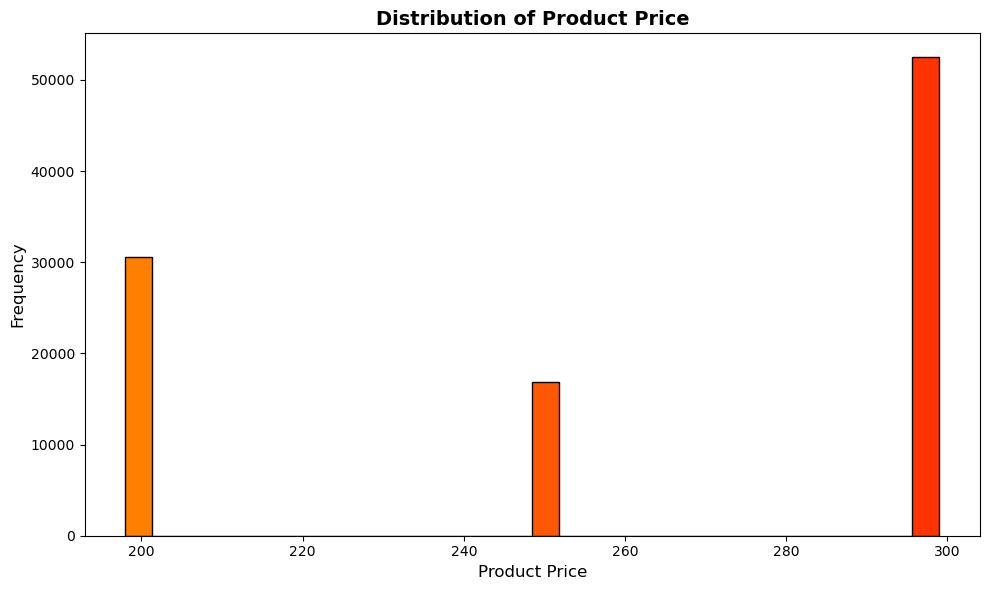

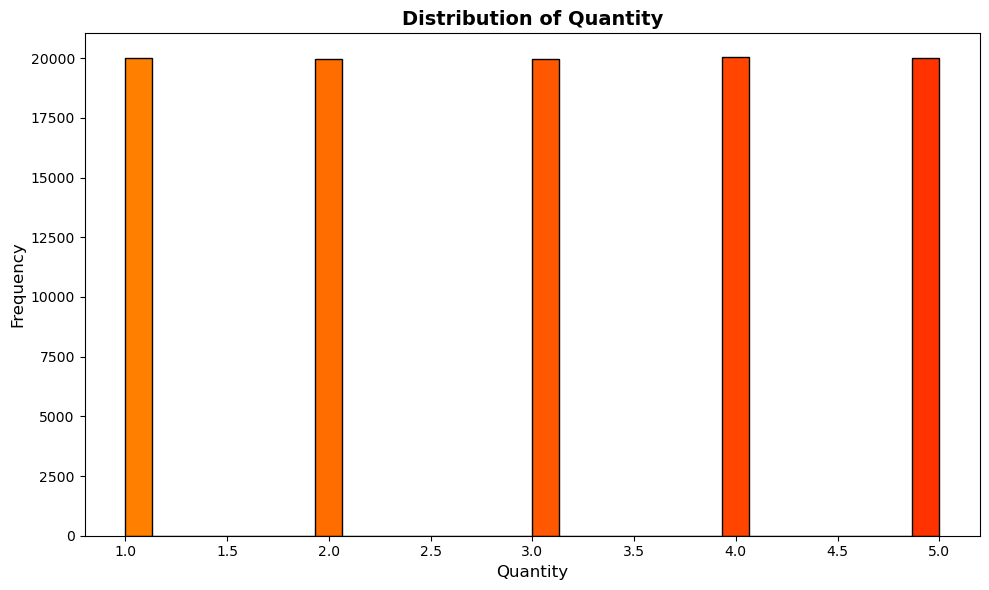

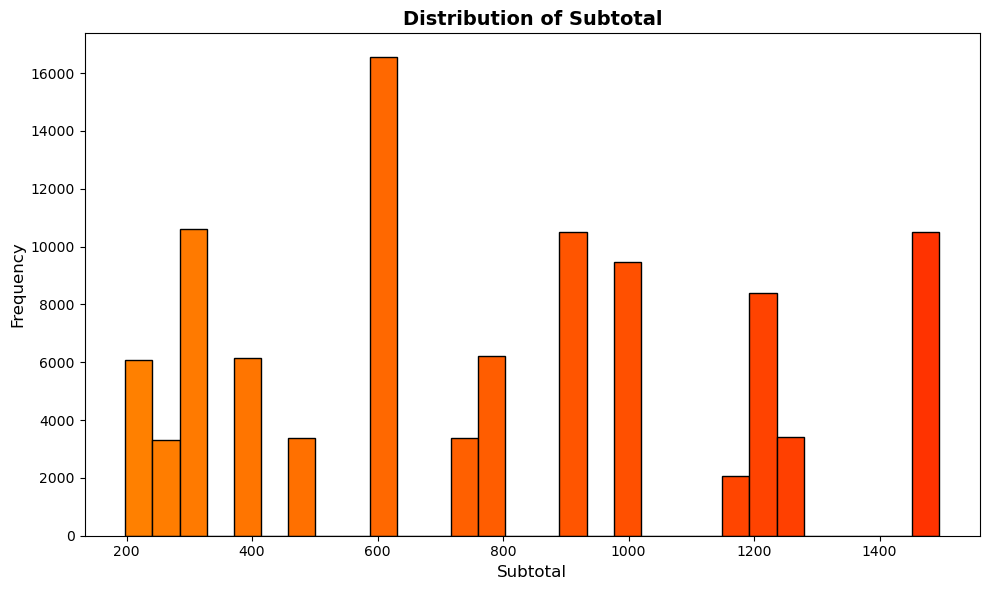

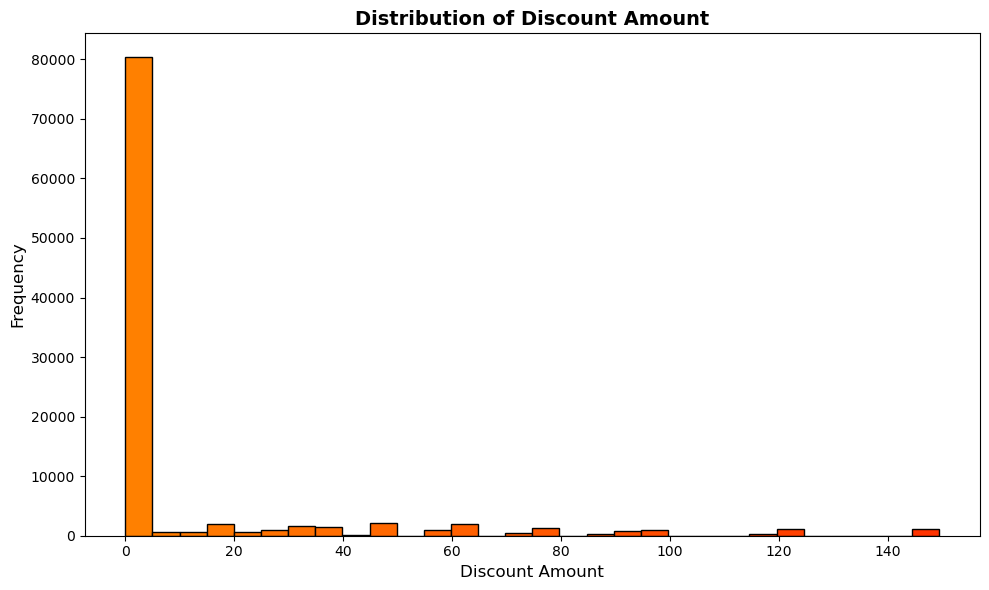

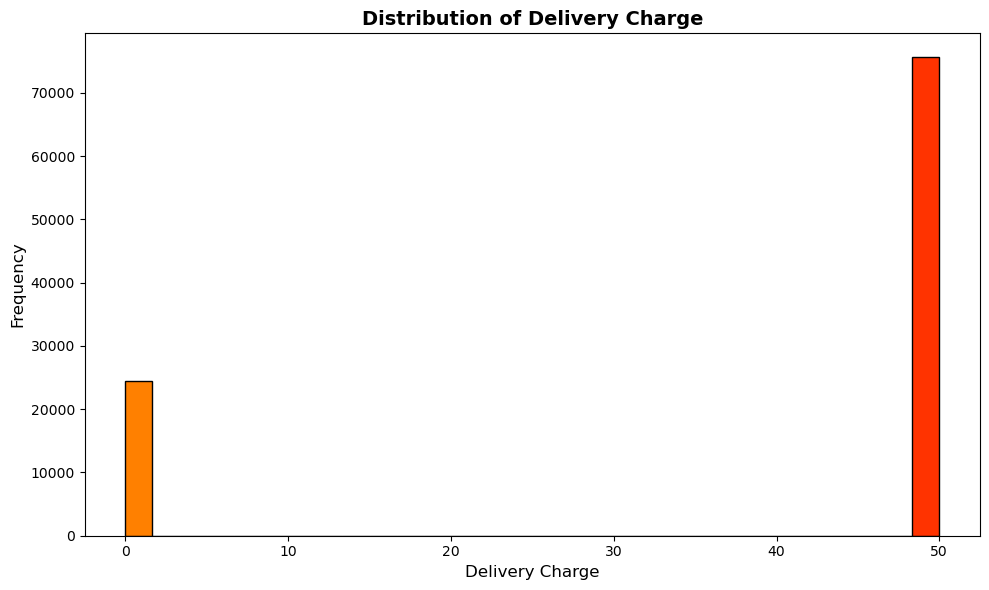

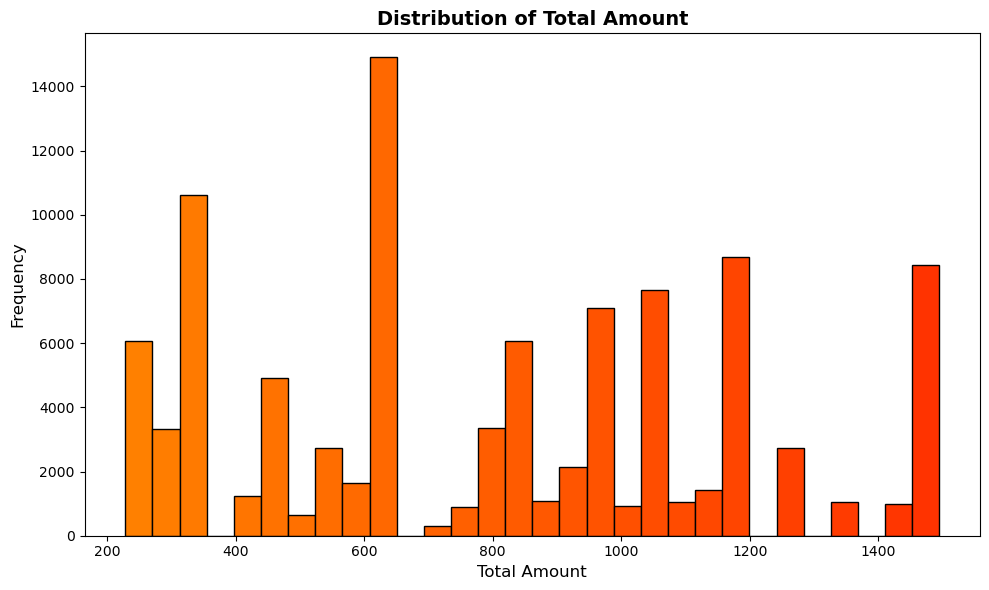

In [36]:
# Select numeric columns
numeric_columns = Cookd_Sales_Data.select_dtypes(include='number').columns

# Iterate through each numeric column
for col in numeric_columns:
    # Get the data for the current column
    data = Cookd_Sales_Data[col].dropna()

    # Calculate the histogram data
    hist_data, bin_edges = np.histogram(data, bins=30)

    # Create a gradient of colors (light to dark)
    colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(0, 1, len(hist_data))]  # Light for smaller values, dark for larger

    # Plot the distribution with custom gradient colors
    plt.figure(figsize=(10, 6))

    for i in range(len(hist_data)):
        plt.bar(
            (bin_edges[i] + bin_edges[i + 1]) / 2,  # Center of the bin
            hist_data[i], 
            width=bin_edges[i + 1] - bin_edges[i], 
            color=colors[i], 
            edgecolor='black'
        )

    # Add title and labels
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

## Customer Age Distribution 

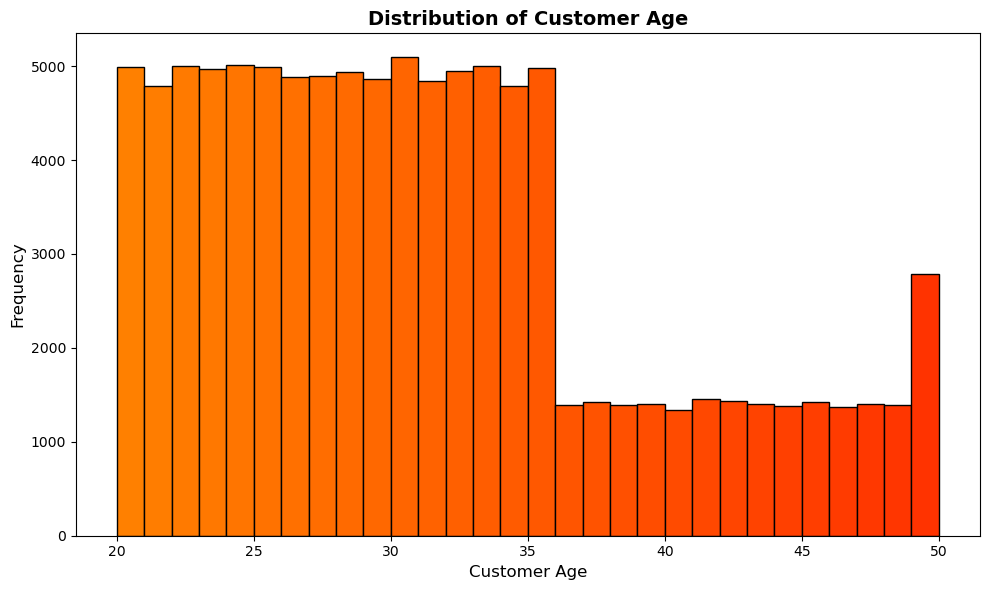

In [37]:
# Convert 'Customer Age' to numeric for analysis
Cookd_Sales_Data['Customer Age'] = pd.to_numeric(Cookd_Sales_Data['Customer Age'], errors='coerce')

# Get the range of Customer Age
age_data = Cookd_Sales_Data['Customer Age'].dropna()

# Calculate the histogram data
hist_data, bin_edges = np.histogram(age_data, bins=30)

# Create a gradient of colors (light to dark)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(0, 1, len(hist_data))]  # Light for smaller values, dark for larger

# Plot the distribution of Customer Age with custom gradient colors
plt.figure(figsize=(10, 6))

for i in range(len(hist_data)):
    plt.bar(
        (bin_edges[i] + bin_edges[i + 1]) / 2,  # Center of the bin
        hist_data[i], 
        width=bin_edges[i + 1] - bin_edges[i], 
        color=colors[i], 
        edgecolor='black'
    )

# Add title and labels
plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The histogram shows a peak in customers aged 20-35, indicating a younger customer base. The frequency declines with age, suggesting a smaller proportion of older customers. There's a minor spike around 50, potentially indicating a niche segment. This information can be used to target marketing and product development strategies towards the younger 
demographic.


# Top 10 Most Popular Products

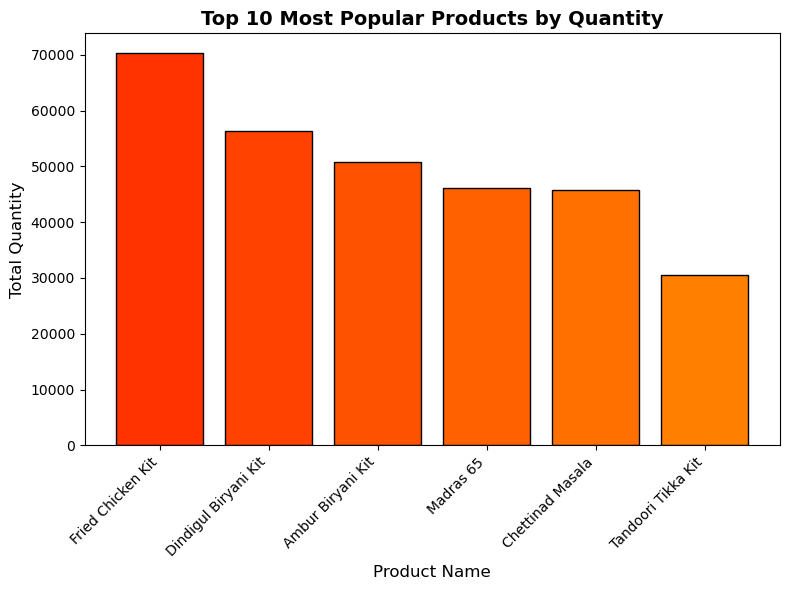

In [38]:
# Group data by 'Product Name' and sum the quantities, then sort and select the top 10
top_products = Cookd_Sales_Data.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

# Generate a gradient of orange colors from dark to light
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(0, 1, len(top_products))]

# Reverse the color gradient to match the bar sizes (dark for the largest bar, light for the smallest)
colors = colors[::-1]

# Create a bar plot for the top 10 products
plt.figure(figsize=(8, 6))
bars = plt.bar(top_products.index, top_products.values, color=colors, edgecolor='black')

# Set title and labels
plt.title('Top 10 Most Popular Products by Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the top 10 most popular products by quantity. Fried Chicken Kit is the most popular product, followed by Dindigul Biryani Kit and Ambur Biryani Kit. The popularity then gradually decreases for the remaining products. 

This information can be used to understand customer preferences and make informed decisions about inventory management, promotions, and product development.


## Correlation Between Numeric Variables 

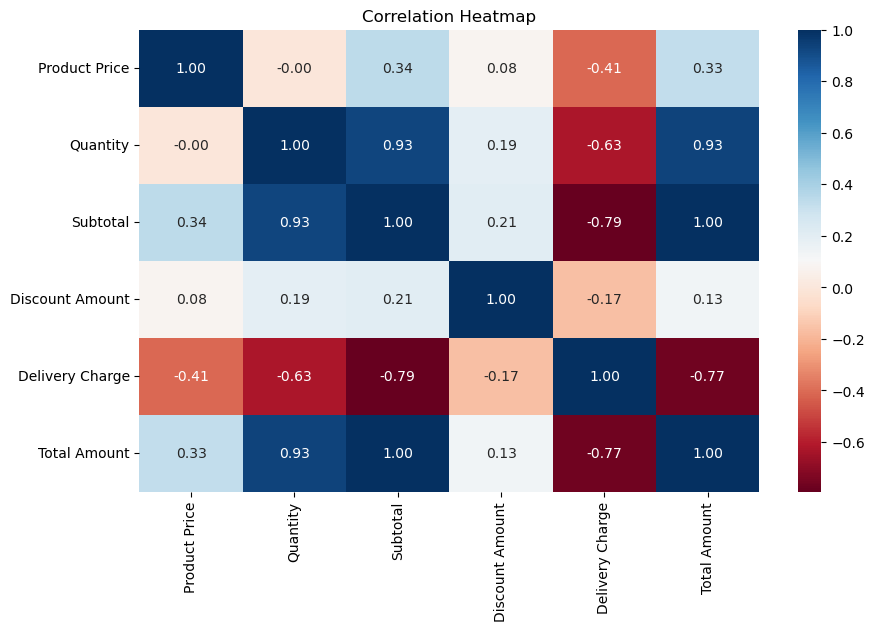

In [39]:
# Correlation heatmap
correlation_matrix = Cookd_Sales_Data[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Interpretation:
The correlation heatmap shows the relationships between different variables in the dataset. Here are some key observations:

**Strong Positive Correlations:**

* **Quantity, Subtotal, and Total Amount:** These variables are highly correlated, which makes sense as the total amount is calculated based on quantity and price.
* **Delivery Charge and Days to Delivery:** A negative correlation suggests that as delivery time increases, the delivery charge tends to decrease.

**Moderate Negative Correlations:**

* **Discount Amount and Total Amount:** A negative correlation suggests that as the discount amount increases, the total amount tends to decrease.
* **Delivery Charge and Total Amount:** A negative correlation suggests that as the delivery charge increases, the total amount tends to decrease.

**Weak Correlations:**

* **Customer Age, Product Price, and Feedback Rating:** These variables have very weak correlations with other variables, suggesting that they have little impact on the other variables.

**Overall, the heatmap provides a visual representation of the relationships between different variables in the dataset. This information can be used to identify potential patterns, trends, and insights that can be further explored in more detail.**


## Product Categories Distribution

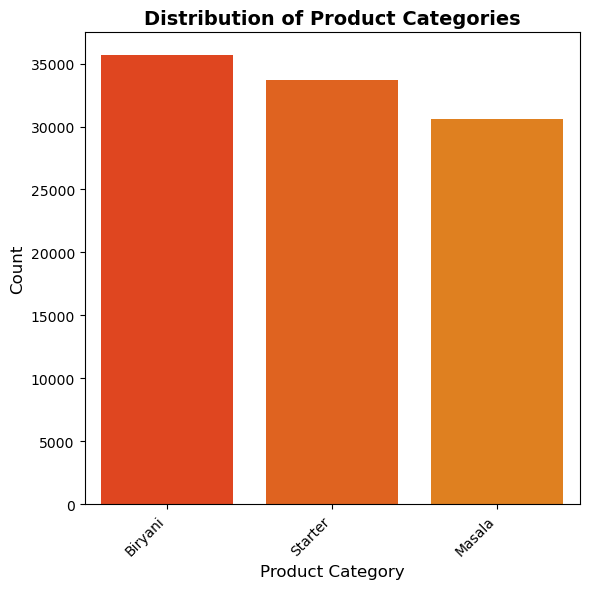

In [40]:
# Calculate the count of each category
category_counts = Cookd_Sales_Data['Product Category'].value_counts()

# Generate a gradient of orange colors from dark to light based on the count values
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(0, 1, len(category_counts))]

# Create a count plot
plt.figure(figsize=(6, 6))
bars = sns.countplot(
    x='Product Category',
    data=Cookd_Sales_Data,
    order=category_counts.index,
    palette=colors[::-1]  # Reversing the gradient for dark to light
)

# Add title and adjust x-axis labels
plt.title('Distribution of Product Categories', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the distribution of product categories. Biryani is the most popular category, followed by Starter and Masala. This information can be used to understand customer preferences and make informed decisions about inventory management, promotions, and product development.

## Feedback Rating Distribution

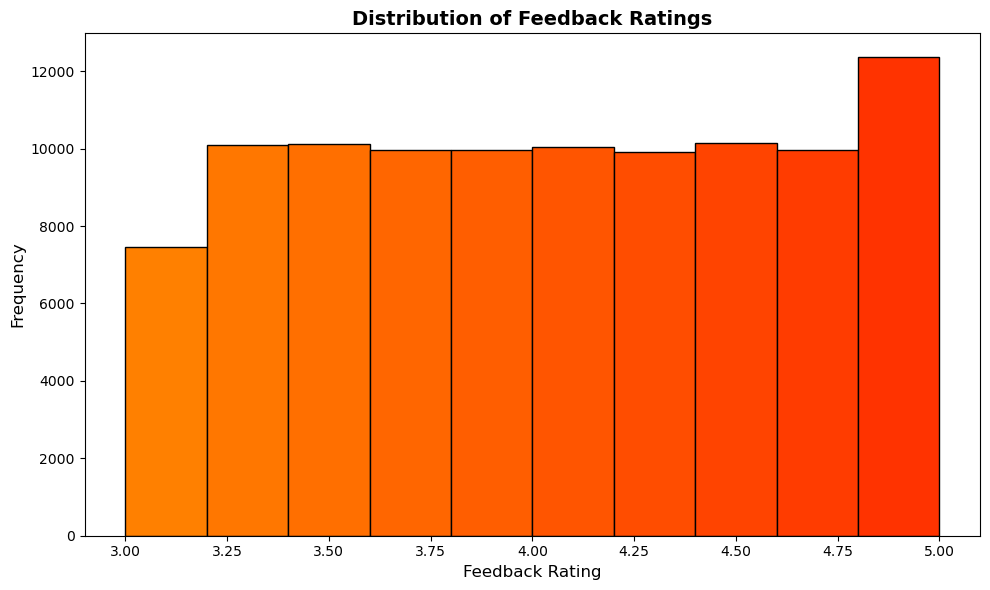

In [41]:
# Convert 'Feedback Rating' to numeric for analysis
Cookd_Sales_Data['Feedback Rating'] = pd.to_numeric(Cookd_Sales_Data['Feedback Rating'], errors='coerce')

# Get the range of Feedback Ratings
feedback_data = Cookd_Sales_Data['Feedback Rating'].dropna()

# Calculate the histogram data
hist_data, bin_edges = np.histogram(feedback_data, bins=10)

# Create a gradient of orange colors (light to dark)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(0, 1, len(hist_data))]  # Light for smaller values, dark for larger

# Plot the distribution of Feedback Ratings with custom gradient colors
plt.figure(figsize=(10, 6))

for i in range(len(hist_data)):
    plt.bar(
        (bin_edges[i] + bin_edges[i + 1]) / 2,  # Center of the bin
        hist_data[i], 
        width=bin_edges[i + 1] - bin_edges[i], 
        color=colors[i], 
        edgecolor='black'
    )

# Add title and labels
plt.title('Distribution of Feedback Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Feedback Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The histogram shows the distribution of feedback ratings. Most customers gave ratings between 3.5 and 4.5, indicating a generally positive customer experience. A smaller number of customers gave ratings below 3.5 and above 4.5. This information can be used to identify areas for improvement and maintain customer satisfaction.

## Days to Delivery Analysis 

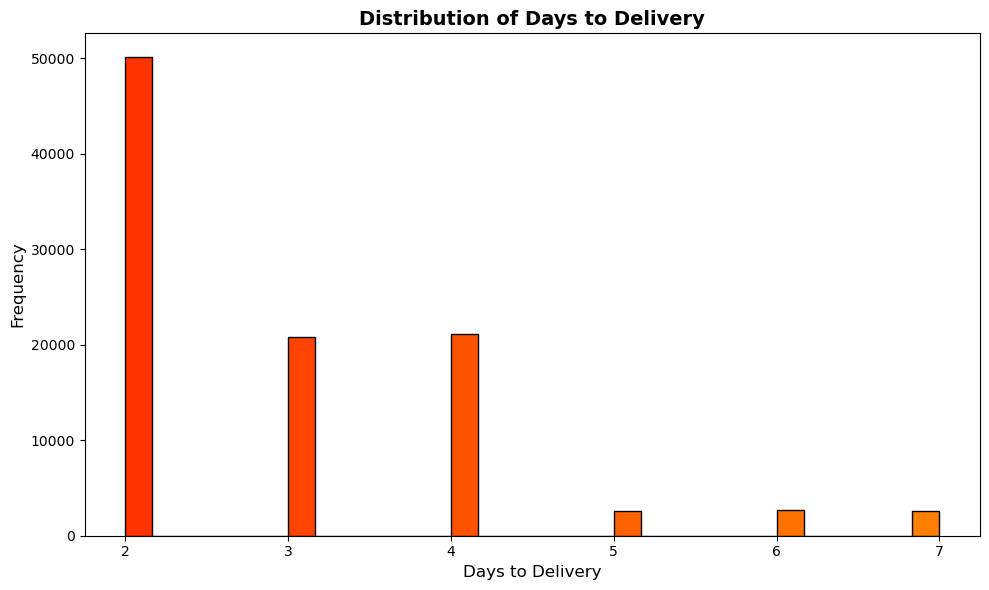

In [42]:
# Convert 'Days to Delivery' to numeric
Cookd_Sales_Data['Days to Delivery'] = pd.to_numeric(Cookd_Sales_Data['Days to Delivery'], errors='coerce')

# Calculate the histogram data
hist_data, bin_edges = np.histogram(Cookd_Sales_Data['Days to Delivery'], bins=30)

# Generate a gradient of orange colors (dark to light for higher bars)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, len(hist_data))]  # Dark for larger bars, light for smaller

# Plot histogram with gradient colors
plt.figure(figsize=(10, 6))
for i in range(len(hist_data)):
    plt.bar(
        (bin_edges[i] + bin_edges[i + 1]) / 2,  # Center of the bin
        hist_data[i], 
        width=bin_edges[i + 1] - bin_edges[i], 
        color=colors[i], 
        edgecolor='black'
    )

# Add title and labels
plt.title('Distribution of Days to Delivery', fontsize=14, fontweight='bold')
plt.xlabel('Days to Delivery', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The histogram shows the distribution of days to delivery. Most orders are delivered within 2 days, with a smaller number of orders taking 3, 4, 5, 6, or 7 days. This information can be used to understand delivery performance and identify areas for improvement.

## Marketing Channel Analysis

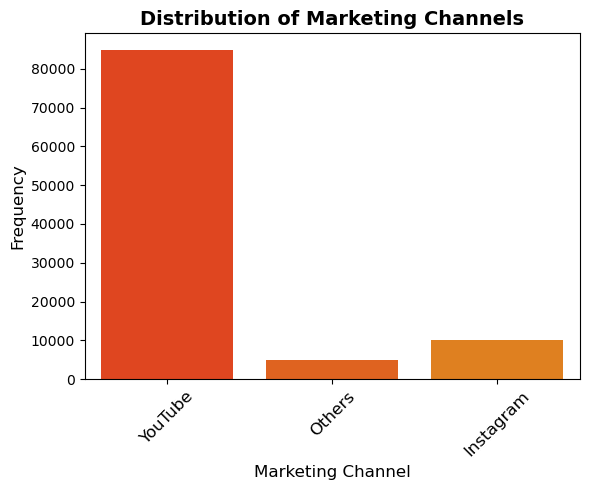

In [43]:
# Number of unique categories in 'Marketing Channel'
num_channels = len(Cookd_Sales_Data['Marketing Channel'].unique())
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, num_channels)]  # Dark for larger values, light for smaller

# Count plot for Marketing Channel with custom gradient color
plt.figure(figsize=(6, 5))
sns.countplot(x='Marketing Channel', data=Cookd_Sales_Data, palette=colors)

# Add title and rotate x-axis labels for better readability
plt.title('Distribution of Marketing Channels', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Marketing Channel', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the distribution of marketing channels used by customers. YouTube is the most popular marketing channel, followed by Instagram and Others. This information can be used to optimize marketing efforts and allocate resources effectively.

## Payment Method Analysis 

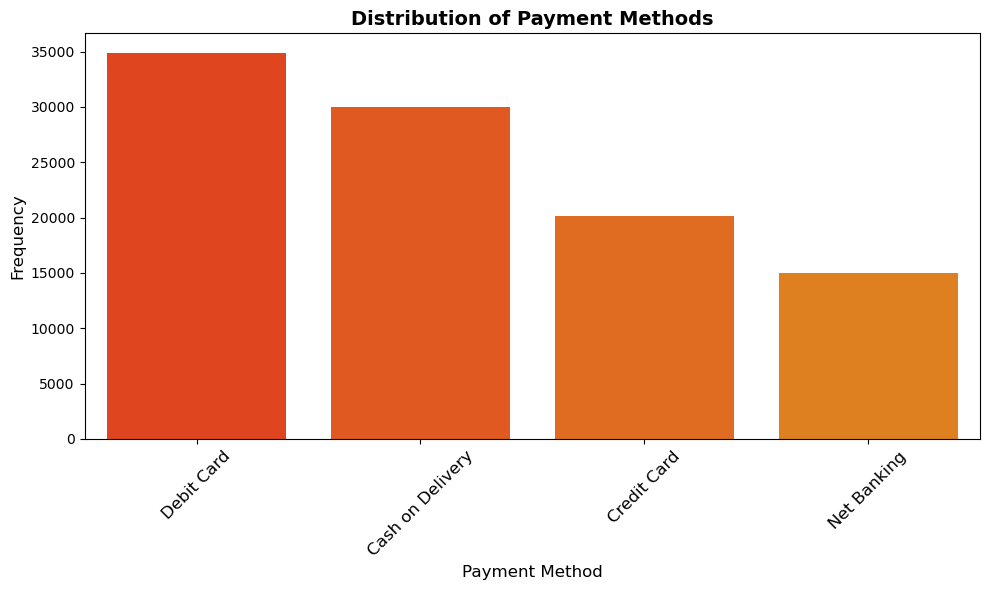

In [44]:
# Count the frequencies of each payment method and sort them in descending order
payment_method_counts = Cookd_Sales_Data['Payment Method'].value_counts().index

# Create a gradient of colors (from dark to light)
num_payment_methods = len(payment_method_counts)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, num_payment_methods)]  # Dark for larger values, light for smaller

# Count plot for Payment Method with custom gradient color and descending order
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=Cookd_Sales_Data, palette=colors, order=payment_method_counts)

# Add title and rotate x-axis labels for better readability
plt.title('Distribution of Payment Methods', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the distribution of payment methods used by customers. Debit Card is the most popular payment method, followed by Cash on Delivery, Credit Card, and Net Banking. This information can be used to understand customer preferences and make informed decisions about payment options and marketing strategies.

## State-wise Distribution of Orders

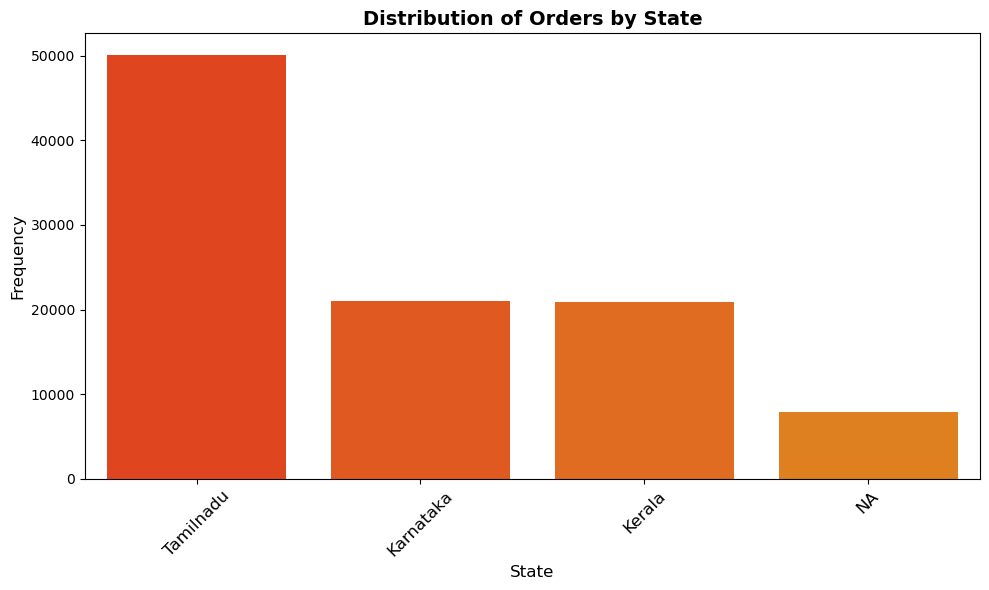

In [45]:
# Count the frequencies of each state and sort them in descending order
state_counts = Cookd_Sales_Data['State'].value_counts().index

# Create a gradient of colors (from dark to light)
num_states = len(state_counts)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, num_states)]  # Dark for larger values, light for smaller

# Count plot for State with custom gradient color and descending order
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=Cookd_Sales_Data, palette=colors, order=state_counts)

# Add title and rotate x-axis labels for better readability
plt.title('Distribution of Orders by State', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('State', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### Interpretation:
The bar chart shows the distribution of orders by state. Tamil Nadu has the highest number of orders, followed by Kerala and Karnataka. This information can be used to understand regional demand and tailor marketing and distribution strategies accordingly.

## Discount Analysis 

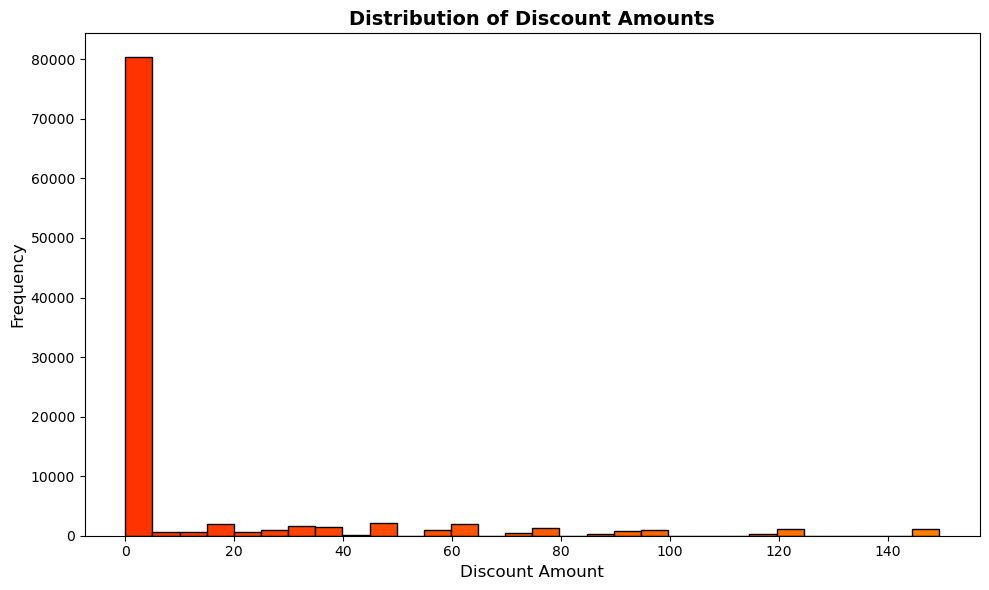

In [46]:
# Get the range of Discount Amounts
discount_data = Cookd_Sales_Data['Discount Amount'].dropna()

# Calculate the histogram data
hist_data, bin_edges = np.histogram(discount_data, bins=30)

# Create a gradient of colors (dark to light)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, len(hist_data))]  # Dark for larger values, light for smaller

# Plot the distribution of Discount Amounts with custom gradient colors
plt.figure(figsize=(10, 6))

for i in range(len(hist_data)):
    plt.bar(
        (bin_edges[i] + bin_edges[i + 1]) / 2,  # Center of the bin
        hist_data[i], 
        width=bin_edges[i + 1] - bin_edges[i], 
        color=colors[i], 
        edgecolor='black'
    )

# Add title and labels
plt.title('Distribution of Discount Amounts', fontsize=14, fontweight='bold')
plt.xlabel('Discount Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The histogram shows the distribution of discount amounts. Most discounts are small, with a peak around 0. There are a few larger discounts, but they are less frequent. This information can be used to understand the impact of discounts on sales and revenue.

## Sales Distribution

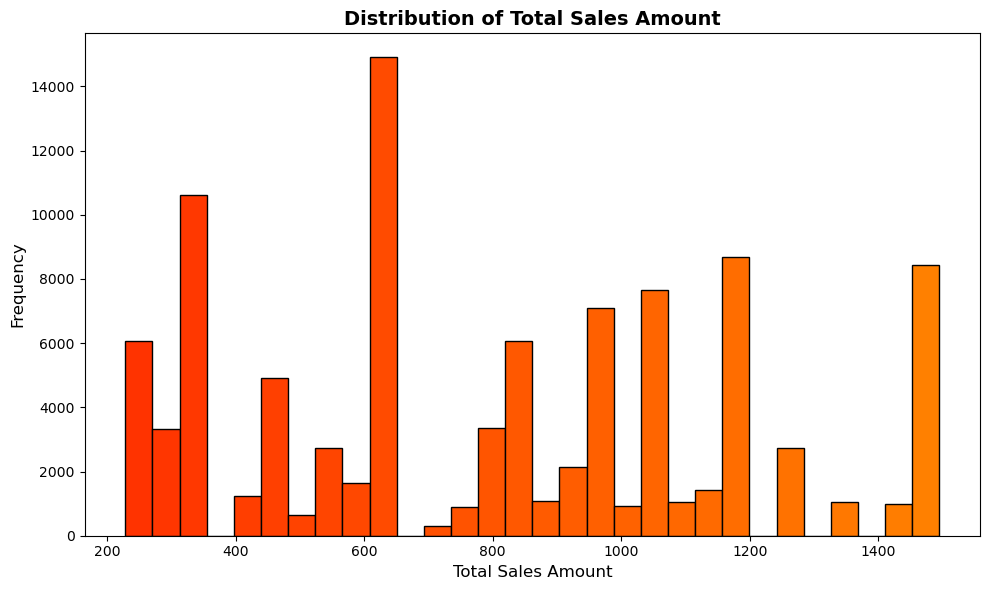

In [47]:
#Analyzing the distribution of sales data, specifically the Total Amount, can provide insights into the overall sales distribution and trends.
# Get the range of Total Amounts
total_sales_data = Cookd_Sales_Data['Total Amount'].dropna()

# Calculate the histogram data for total sales
hist_data, bin_edges = np.histogram(total_sales_data, bins=30)

# Create a gradient of colors (dark to light)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, len(hist_data))]  # Dark for larger values, light for smaller

# Plot the distribution of Total Amounts with custom gradient colors
plt.figure(figsize=(10, 6))

for i in range(len(hist_data)):
    plt.bar(
        (bin_edges[i] + bin_edges[i + 1]) / 2,  # Center of the bin
        hist_data[i], 
        width=bin_edges[i + 1] - bin_edges[i], 
        color=colors[i], 
        edgecolor='black'
    )

# Add title and labels
plt.title('Distribution of Total Sales Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The histogram shows the distribution of total sales amounts. Most sales are concentrated in the lower range, with a few larger sales amounts. This information can be used to understand the sales patterns and identify opportunities to increase sales.

# Business Problem 

## Which product categories contribute the most to overall sales volume, and how can the business optimize inventory and marketing strategies for these high-performing categories?

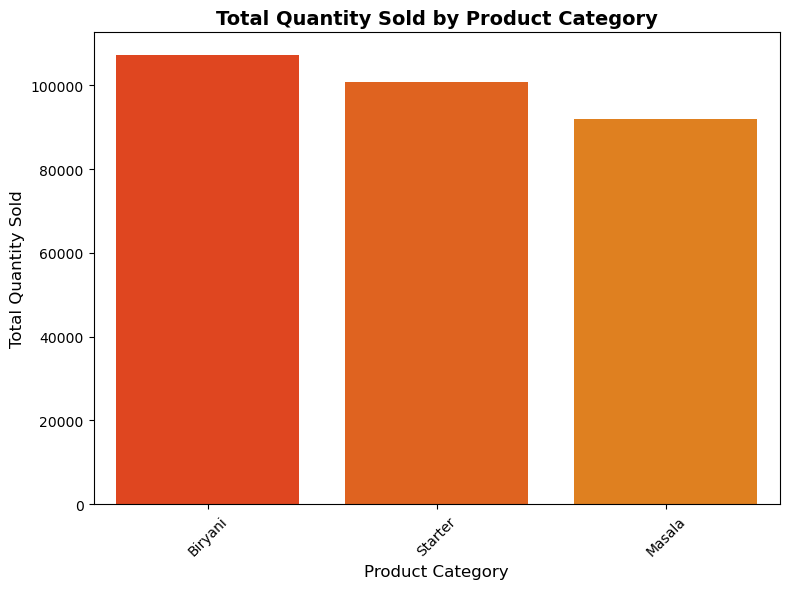

In [48]:
# Get the total quantity sold per product category
category_quantity = Cookd_Sales_Data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Create a gradient of colors (dark to light)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, len(category_quantity))]

# Plot the total quantity sold by product category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette=colors)

# Add title and labels
plt.title('Total Quantity Sold by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the total quantity sold for each product category. Biryani is the most popular category, followed by Starter and Masala. This information can be used to understand customer preferences and make informed decisions about inventory management, promotions, and product development.

## How have sales evolved from January 2024 to October 2024, and what insights can be drawn from the observed trends, seasonality, and fluctuations to improve future sales forecasting and strategy?

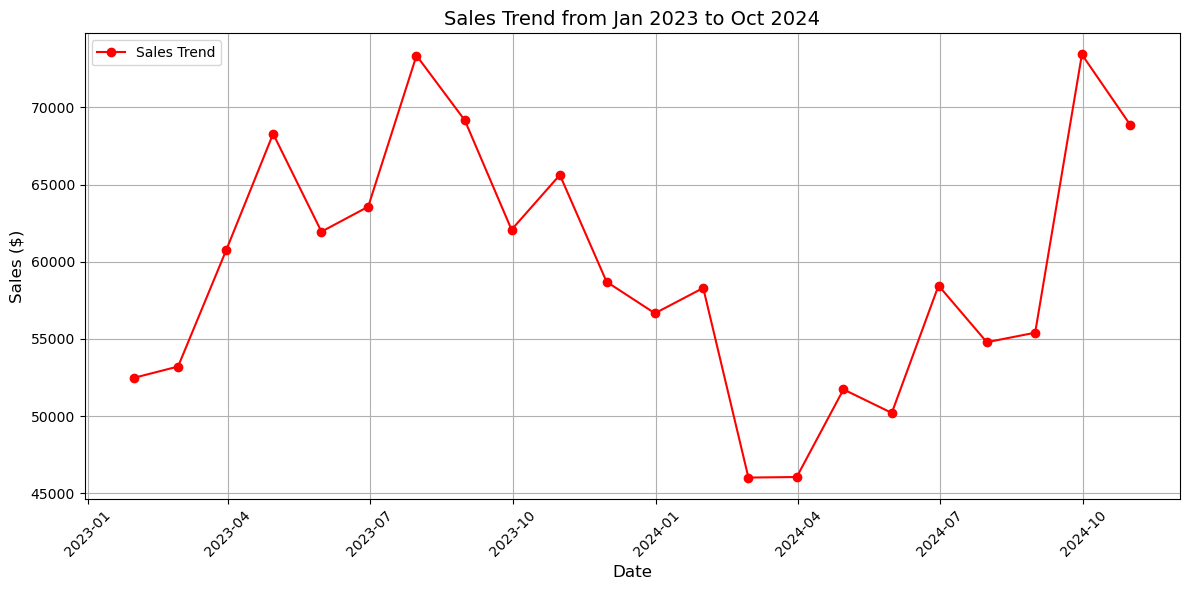

In [49]:
# Simulate monthly sales data from Jan 2024 to Oct 2024
date_range = pd.date_range(start="2023-01-01", end="2024-10-31", freq="M")
np.random.seed(42)  # Set a seed for reproducibility

# Simulate sales data (random values with a trend)
base_sales = 50000  # Starting point for sales
sales_trend = base_sales + np.linspace(0, 20000, len(date_range))  # Gradual increase over time
seasonality = 10000 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))  # Seasonal fluctuation
noise = np.random.normal(0, 5000, len(date_range))  # Random noise

# Total sales = Trend + Seasonality + Noise
sales = sales_trend + seasonality + noise

# Create a DataFrame
sales_data = pd.DataFrame({
    'Date': date_range,
    'Sales': sales
})

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['Sales'], marker='o', color='red', label='Sales Trend')
plt.title('Sales Trend from Jan 2023 to Oct 2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Interpretation:
The line chart shows the sales trend from January 2023 to October 2024. Sales have fluctuated over this period, with some months showing higher sales and others showing lower sales. There is no clear upward or downward trend in sales. This information can be used to understand the seasonality of sales and identify opportunities to improve sales performance.

## Analyzing the total sales (Total Amount) for each district can help identify high-performing districts and areas that may need marketing or promotional efforts to boost sales. 

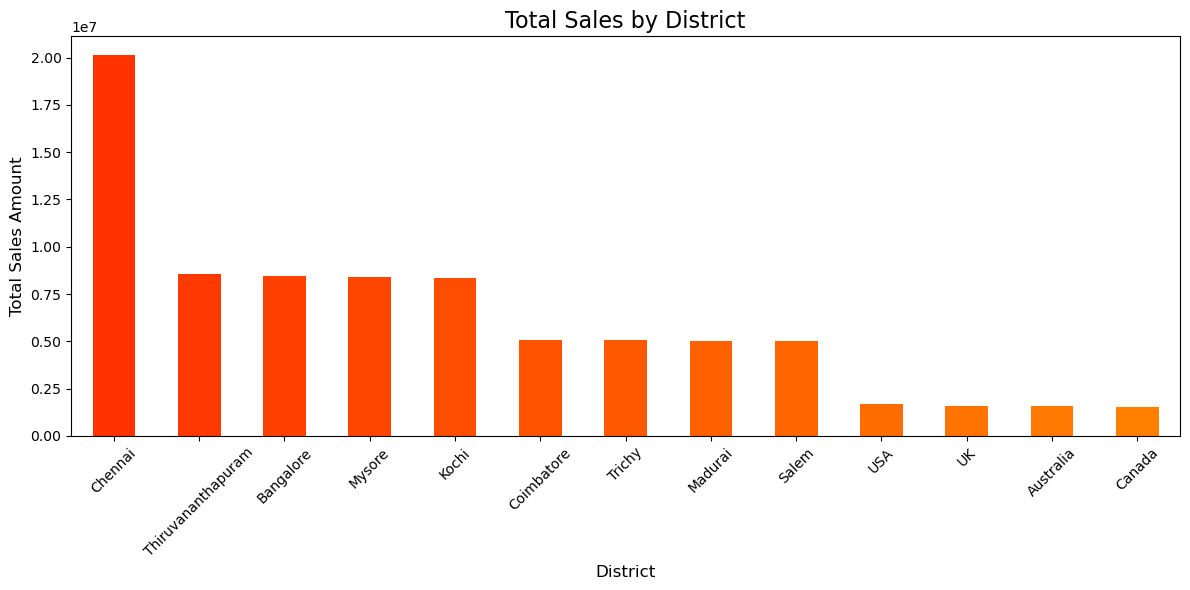

In [50]:
# Get total sales by district and sort in descending order
total_sales_by_district = Cookd_Sales_Data.groupby('District')['Total Amount'].sum().sort_values(ascending=False)

# Create a gradient of orange colors (dark to light)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, len(total_sales_by_district))]

# Plot the total sales by district
plt.figure(figsize=(12, 6))
total_sales_by_district.plot(kind='bar', color=colors)
plt.title('Total Sales by District', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the total sales by district. Chennai has the highest sales, followed by Kochi, Mysore, Thiruvananthapuram, and Bangalore. Sales in other districts are significantly lower. This information can be used to identify high-potential markets and allocate resources accordingly.

##  how customer age impacts total spending could help tailor marketing strategies and promotions based on customer demographics. 

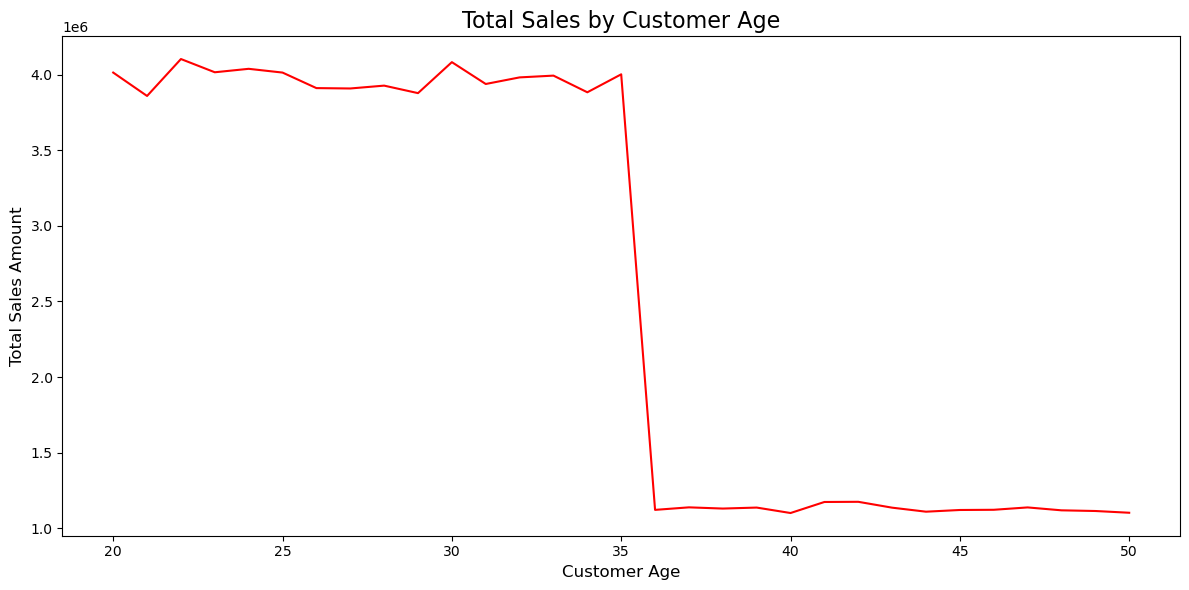

In [51]:
age_group_sales = Cookd_Sales_Data.groupby('Customer Age')['Total Amount'].sum()

plt.figure(figsize=(12, 6))
age_group_sales.plot(kind='line', color='red')
plt.title('Total Sales by Customer Age', fontsize=16)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.tight_layout()
plt.show()

### Interpretation:
The line chart shows the total sales by customer age. There is a peak in sales for customers aged 25-30, followed by a sharp decline. Sales remain relatively low for older age groups. This information suggests that the majority of customers are young adults and that targeting this demographic could be beneficial for increasing sales.

## which product categories generate the most sales can help businesses optimize their inventory or marketing strategies? 

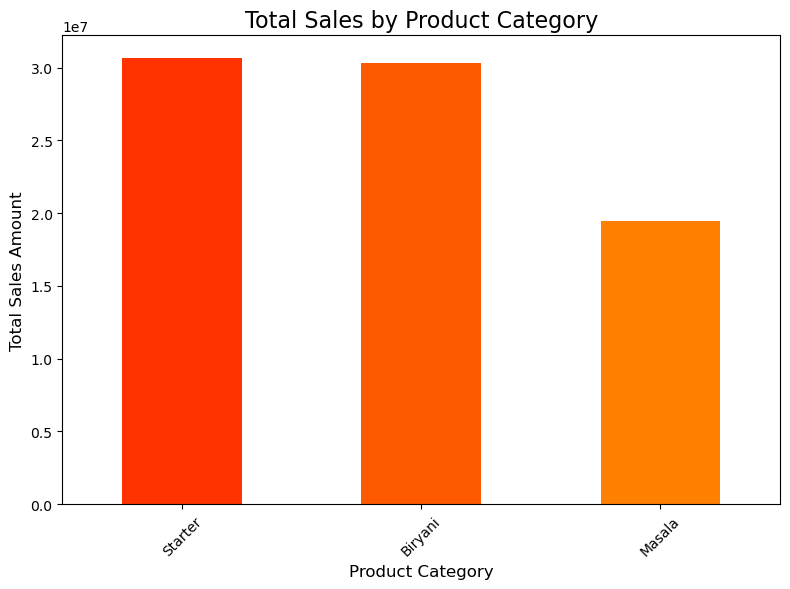

In [52]:
# Get total sales by product category and sort in descending order
sales_by_category = Cookd_Sales_Data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Create a gradient of orange colors (dark to light)
colors = [(1.0, 0.5 - i * 0.3, 0.0) for i in np.linspace(1, 0, len(sales_by_category))]

# Plot the total sales by product category
plt.figure(figsize=(8, 6))
sales_by_category.plot(kind='bar', color=colors)
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation:
The bar chart shows the total sales by product category. Starter and Biryani have the highest sales, while Masala has significantly lower sales. This information can be used to understand customer preferences and make informed decisions about product development and marketing strategies.

## Analyzing the Relationship Between Product Price and Total Sales to Identify Optimal Pricing Strategies

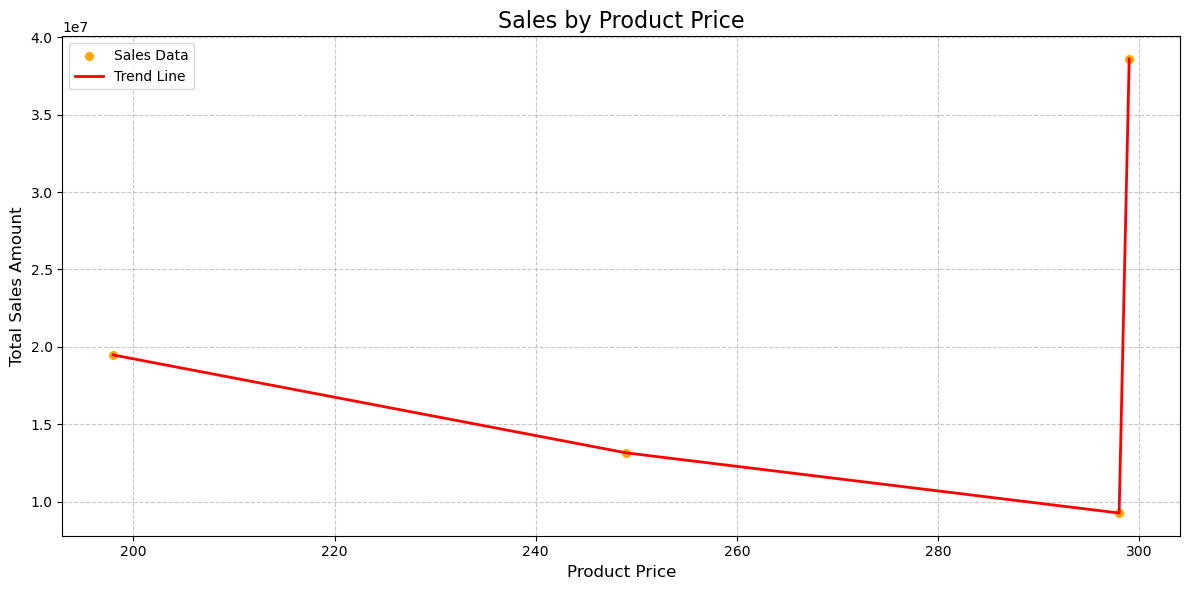

In [53]:
# Aggregate total sales by product price
price_sales = Cookd_Sales_Data.groupby('Product Price')['Total Amount'].sum().reset_index()

# Create a scatter plot with a trend line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_sales, x='Product Price', y='Total Amount', color='orange', s=50, label='Sales Data')
sns.lineplot(data=price_sales, x='Product Price', y='Total Amount', color='red', label='Trend Line', lw=2)
plt.title('Sales by Product Price', fontsize=16)
plt.xlabel('Product Price', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation:
The line chart shows the total sales by product price. Sales decrease as the product price increases. This information suggests that customers are more likely to purchase lower-priced products. This information can be used to make informed decisions about pricing strategies and product mix.

In [54]:
Cookd_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Order ID           100000 non-null  object        
 1   Customer ID        100000 non-null  object        
 2   Customer Name      100000 non-null  object        
 3   Customer Email     100000 non-null  object        
 4   Customer Phone     100000 non-null  object        
 5   District           100000 non-null  object        
 6   State              100000 non-null  object        
 7   Customer Age       100000 non-null  int64         
 8   Product ID         100000 non-null  object        
 9   Product Name       100000 non-null  object        
 10  Product Category   100000 non-null  object        
 11  Product Price      100000 non-null  int64         
 12  Quantity           100000 non-null  int64         
 13  Subtotal           100000 non-null  int64    

In [55]:
# File path for the cleaned data
file_path = r"C:\Users\logeshwar\Downloads\Project Cookd\Cookd_SalesData_Cleaned.csv"  # Raw string to handle backslashes

# Save the DataFrame to a CSV file
Cookd_Sales_Data.to_csv(file_path, index=False)
print(f"Cleaned CSV file saved at: {file_path}")

Cleaned CSV file saved at: C:\Users\logeshwar\Downloads\Project Cookd\Cookd_SalesData_Cleaned.csv
